In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [21]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [24]:
df_exames.head(10)

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
5,M,64,93,190,117
6,F,21,70,182,90
7,F,60,101,179,84
8,F,63,83,189,92
9,F,65,78,175,121


In [30]:
# Remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)


In [32]:
# Converter uma variavel categorica (genero) em numerica , usando One Hot Encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [33]:
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


<Axes: >

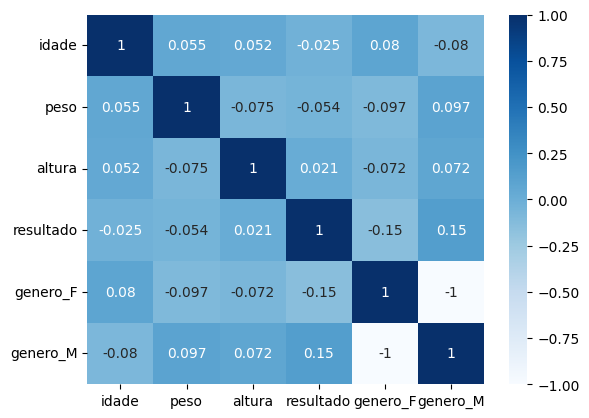

In [36]:
# Apresentar Mapa de color com correlacao entre as variaveis
sns.heatmap(df_exames.corr(), vmin=-1 , vmax=1,annot=True, cmap='Blues')

<Axes: >

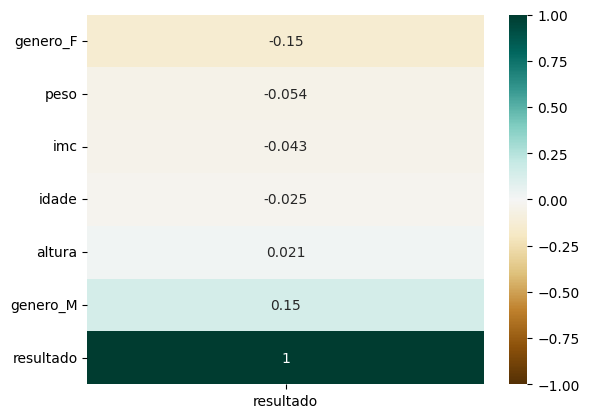

In [55]:
# Mapa de Corelação só com a variavel alvo (resultado)
sns.heatmap(
    df_exames.corr()[['resultado']].sort_values(by='resultado'), 
    vmin=-1 , 
    vmax=1,
    annot=True, 
    cmap='BrBG'
)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

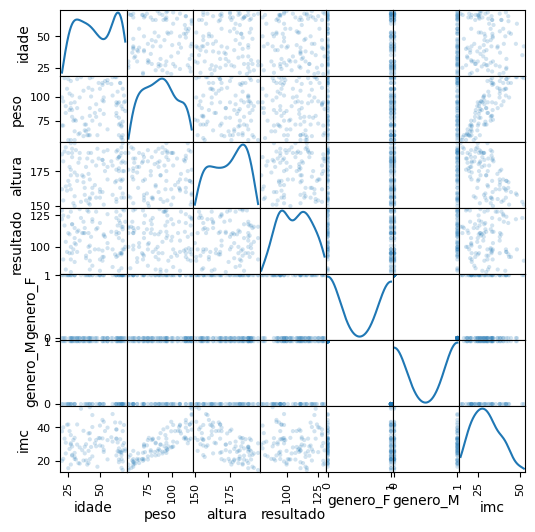

In [54]:
#plot de Scatter (dispersão) Com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2,figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

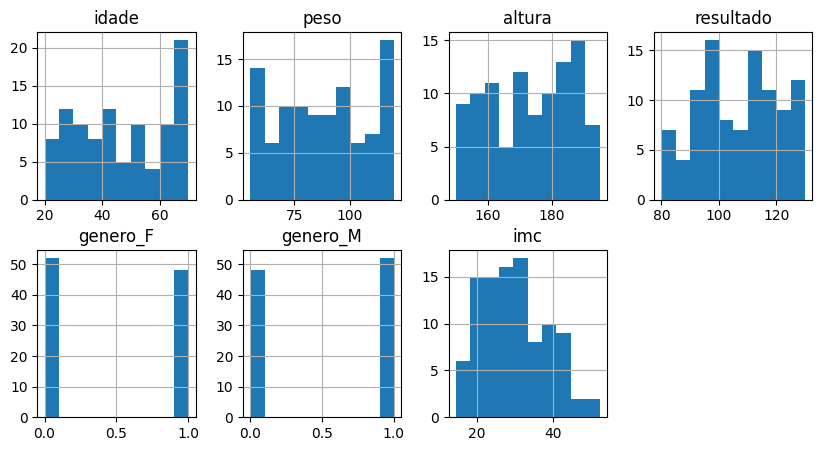

In [56]:
# Histograma de todas as verivaies
df_exames.hist(layout=(2,4), figsize=(10,5))

In [50]:
# Criar uma feature nova
# IMC (INDEICA DE MASSA COMPORAL)
# IMC = peso / altura * altura
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2))

In [64]:
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [82]:
X = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']


In [83]:
X


,idade,peso,altura,genero_F,genero_M
0,46,83,165,0,1
1,23,83,164,1,0
2,39,71,154,0,1
3,26,103,165,1,0
4,27,55,176,0,1
...,...,...,...,...,...
95,52,96,183,1,0
96,68,108,169,1,0
97,21,95,154,0,1
98,41,109,173,0,1


In [89]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=51
)

In [90]:
y_test

71     92
43    103
11    115
83    112
78    126
19    116
80     81
4     100
79    120
75    110
72    100
44    130
46    102
90     97
56    123
2      93
47    123
51    116
0      98
97    125
65     93
12    111
32    107
82    128
66     96
14     80
81    119
91    113
15     91
74    128
Name: resultado, dtype: int64

In [94]:
# Treinar o modelo de regreção Linear  -Modelo1

model_1 = LinearRegression().fit(X_train, y_train)

In [95]:
# Gerar predições do conjunto de teste com base no Modelo 1
y_pred= model_1.predict(X_test)

In [96]:
# Equação da Reta - regreção Linear
# y = ax -b
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [97]:
model_1.intercept_

np.float64(94.21133142019875)

In [99]:
# R2 Score
model_1.score(X_train, y_train)

0.06218388634297267

In [98]:
# R2 Score - conjunto de teste
model_1.score(X_test, y_test)

-0.1364090447910642

In [100]:
# R2 Score - Testes
r2_score(y_test,y_pred)

-0.1364090447910642

In [101]:
# Mae (Mean absolute Error)
mean_absolute_error(y_test, y_pred)


12.695569181179541

In [102]:
# Segundo modelo - Apenas IMC

X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=51
)

In [104]:
#Treinar o algoritimo de Regreção linear _modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

In [106]:
# Gerar predição com base no modelo para conjunto de testes
y_pred = model_2.predict(X_test)

In [107]:
model_2.coef_

array([-0.21677589])

In [108]:
model_2.intercept_

np.float64(112.15019229088836)

In [109]:
# R2 Score no conjunto de treinamento
model_2.score(X_train,y_train)

0.015285962664806862

In [110]:
# R2 Score no conjunto de Testes
model_2.score(X_test, y_test)

-0.0889832856240178

In [111]:
# MAE ( Mean absolut error)
mean_absolute_error(y_test,y_pred)

12.505651407060103

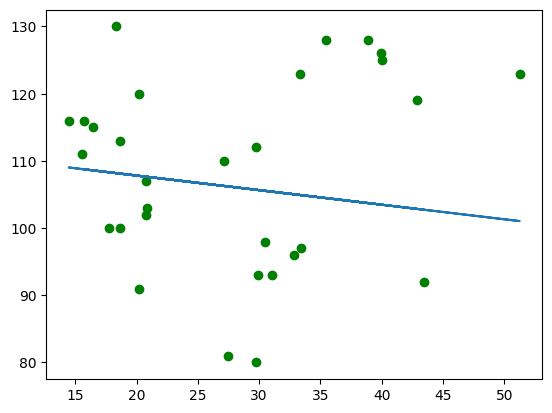

In [113]:
# Mostrar como a reta foi calculado

plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred)